!pip install git+https://github.com/CC-RMD-EpiBio/autoencirt.git

In [1]:
%pylab inline
import numpy as np
import sys
sys.path.append('../bayesianquilts')

import matplotlib.pyplot as plt


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from factor_analyzer import FactorAnalyzer

In [3]:
import tensorflow as tf
import autoencirt
from autoencirt.irt import GRModel, FactorizedGRModel
from autoencirt.data.rwa import item_text, get_data

dim = 2

In [4]:
pd_data = get_data(reorient=True, pandas=True)
responses = pd_data[0].iloc[:, :22]
fa = FactorAnalyzer(n_factors=dim)
fa.fit(responses)
loadings = fa.loadings_
loadings.shape


(22, 2)

In [5]:
tfdata, num_people = get_data(reorient=True)
item_names = [f"Q{j}" for j in range(1, 23)]
scale_indices = [
    [1, 3, 5, 7, 8, 10, 12, 14, 15, 17, 19, 20],
    [0, 2, 4, 6, 9, 11, 13, 16, 18, 21],
]
fgrm = FactorizedGRModel(
    data=tfdata,
    item_keys=item_names,
    num_people=num_people,
    dim=dim,
    eta_scale=1e-3,
    kappa_scale=1e-3,
    weight_exponent=1,
    response_cardinality=10,
    scale_indices=scale_indices,
    discrimination_guess=0.5*tf.cast(np.abs(loadings).T, tf.float64)[
        tf.newaxis, :, :, tf.newaxis
    ],
)

grm = GRModel(
    data=tfdata,
    item_keys=item_names,
    num_people=num_people,
    dim=dim,
    eta_scale=1e-3,
    kappa_scale=1e-3,
    weight_exponent=1,
    response_cardinality=10,
    discrimination_guess=0.5*tf.cast(np.abs(loadings).T, tf.float64)[
        tf.newaxis, :, :, tf.newaxis
    ],
)

batch_size = 241


def data_factory_factory(batch_size=batch_size, repeat=False, shuffle=False):
    def data_factory(batch_size=batch_size):
        if shuffle:
            out = tfdata.shuffle(batch_size * 10)
        else:
            out = tfdata

        if repeat:
            out = out.repeat()
        return out.batch(batch_size)

    return data_factory

In [6]:
losses = grm.fit(
            data_factory_factory(shuffle=True, repeat=True),
            dataset_size=num_people,
            batches_per_step=1,
            check_every=int(num_people/batch_size),
            batch_size=batch_size,
            num_steps=2000,
            max_decay_steps=100,
            max_plateau_epochs=100,
            sample_size=32, 
            learning_rate=0.0015)

Running optimization for 2000 steps of 1 accumulated batches, checking every 41 steps
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-1


  2%|▏         | 40/2000 [00:08<04:58,  6.56it/s] 

Step 41: average-batch loss:353138.17078286817 rel loss: 2.8317527889525818e+302
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-2


  4%|▍         | 81/2000 [00:14<04:48,  6.64it/s]

Step 82: average-batch loss:372692.98033520044 rel loss: 0.05246895054139376
New learning rate: 0.001485


  6%|▌         | 122/2000 [00:21<04:03,  7.71it/s]

Step 123: average-batch loss:343982.1770007814 rel loss: 0.02661764008216613
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-3


  8%|▊         | 163/2000 [00:27<04:03,  7.56it/s]

Step 164: average-batch loss:330649.24059796415 rel loss: 0.04032350529130279
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-4


 10%|█         | 204/2000 [00:32<04:02,  7.40it/s]

Step 205: average-batch loss:343238.58165066433 rel loss: 0.03667810591733873
New learning rate: 0.00147015


 12%|█▏        | 245/2000 [00:38<04:01,  7.27it/s]

Step 246: average-batch loss:327365.0332250064 rel loss: 0.010032248528817077
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-5


 14%|█▍        | 286/2000 [00:43<03:34,  8.00it/s]

Step 287: average-batch loss:310758.0823259985 rel loss: 0.05344012543360498
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-6


 16%|█▋        | 327/2000 [00:49<03:42,  7.52it/s]

Step 328: average-batch loss:285499.49955757003 rel loss: 0.08847154831294259
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-7


 18%|█▊        | 368/2000 [00:55<03:56,  6.91it/s]

Step 369: average-batch loss:297208.7803638594 rel loss: 0.03939749287337406
New learning rate: 0.0014554485


 20%|██        | 409/2000 [01:01<03:47,  7.00it/s]

Step 410: average-batch loss:299236.07807740616 rel loss: 0.04590548909775097
New learning rate: 0.001440894015


 22%|██▎       | 450/2000 [01:07<03:37,  7.14it/s]

Step 451: average-batch loss:283255.7315532399 rel loss: 0.007921350759705195
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-8


 25%|██▍       | 491/2000 [01:13<03:29,  7.20it/s]

Step 492: average-batch loss:253644.64144903945 rel loss: 0.11674242331726818
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-9


 27%|██▋       | 532/2000 [01:19<03:29,  7.00it/s]

Step 533: average-batch loss:246155.25785450704 rel loss: 0.030425446361820548
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-10


 29%|██▊       | 573/2000 [01:25<03:03,  7.78it/s]

Step 574: average-batch loss:261393.113052862 rel loss: 0.05829478451206699
New learning rate: 0.0014264850748499998


 31%|███       | 614/2000 [01:30<03:10,  7.26it/s]

Step 615: average-batch loss:250092.90095647555 rel loss: 0.015744721609086344
New learning rate: 0.0014122202241015


 33%|███▎      | 655/2000 [01:36<03:12,  6.97it/s]

Step 656: average-batch loss:203941.0598313344 rel loss: 0.20699214791805587
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-11


 35%|███▍      | 696/2000 [01:42<02:56,  7.39it/s]

Step 697: average-batch loss:251823.02362997993 rel loss: 0.19014132666837344
New learning rate: 0.001398098021860485


 37%|███▋      | 737/2000 [01:49<03:14,  6.49it/s]

Step 738: average-batch loss:216982.93970011 rel loss: 0.06010555432054087
New learning rate: 0.00138411704164188


 39%|███▉      | 778/2000 [01:54<03:09,  6.46it/s]

Step 779: average-batch loss:194517.71508715732 rel loss: 0.04844466088836568
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-12


 41%|████      | 819/2000 [02:01<02:52,  6.84it/s]

Step 820: average-batch loss:218568.38491613505 rel loss: 0.11003727660890204
New learning rate: 0.0013702758712254614


 43%|████▎     | 860/2000 [02:06<02:35,  7.35it/s]

Step 861: average-batch loss:194798.13426481944 rel loss: 0.0014395372867426857
New learning rate: 0.0013565731125132067


 45%|████▌     | 901/2000 [02:13<02:45,  6.63it/s]

Step 902: average-batch loss:174918.74310521144 rel loss: 0.11204615145306268
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-13


 47%|████▋     | 942/2000 [02:19<02:21,  7.49it/s]

Step 943: average-batch loss:176171.47628889885 rel loss: 0.007110874076079626
New learning rate: 0.0013430073813880746


 49%|████▉     | 983/2000 [02:25<02:26,  6.95it/s]

Step 984: average-batch loss:179965.5457779558 rel loss: 0.028043160433448587
New learning rate: 0.001329577307574194


 51%|█████     | 1024/2000 [02:31<02:20,  6.96it/s]

Step 1025: average-batch loss:149458.3812923845 rel loss: 0.17035084678870566
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-14


 53%|█████▎    | 1065/2000 [02:37<02:45,  5.66it/s]

Step 1066: average-batch loss:155440.1278369322 rel loss: 0.038482640408163966
New learning rate: 0.0013162815344984519


 55%|█████▌    | 1106/2000 [02:43<01:53,  7.86it/s]

Step 1107: average-batch loss:194040.19555279316 rel loss: 0.22975556241530967
New learning rate: 0.0013031187191534673


 57%|█████▋    | 1147/2000 [02:49<01:52,  7.59it/s]

Step 1148: average-batch loss:155219.17338363657 rel loss: 0.03711392069466715
New learning rate: 0.0012900875319619327


 59%|█████▉    | 1188/2000 [02:55<02:24,  5.63it/s]

Step 1189: average-batch loss:135773.85229325172 rel loss: 0.10078913404899337
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-15


 61%|██████▏   | 1229/2000 [03:01<02:02,  6.28it/s]

Step 1230: average-batch loss:108734.33202840349 rel loss: 0.24867509424516443
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-16


 64%|██████▎   | 1270/2000 [03:07<01:56,  6.27it/s]

Step 1271: average-batch loss:118894.54157450188 rel loss: 0.08545564339244112
New learning rate: 0.0012771866566423133


 66%|██████▌   | 1311/2000 [03:13<01:50,  6.25it/s]

Step 1312: average-batch loss:143101.08327030466 rel loss: 0.24015717041768003
New learning rate: 0.00126441479007589


 68%|██████▊   | 1352/2000 [03:19<01:27,  7.37it/s]

Step 1353: average-batch loss:116554.60395641514 rel loss: 0.06709534984080079
New learning rate: 0.0012517706421751314


 70%|██████▉   | 1393/2000 [03:25<01:19,  7.66it/s]

Step 1394: average-batch loss:85161.24184303705 rel loss: 0.2768053832377718
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-17


 72%|███████▏  | 1434/2000 [03:31<01:13,  7.65it/s]

Step 1435: average-batch loss:102218.71582701743 rel loss: 0.16687231732441624
New learning rate: 0.00123925293575338


 74%|███████▍  | 1475/2000 [03:37<01:14,  7.06it/s]

Step 1476: average-batch loss:109957.85594635514 rel loss: 0.2255101637796171
New learning rate: 0.0012268604063958462


 76%|███████▌  | 1516/2000 [03:43<01:34,  5.12it/s]

Step 1517: average-batch loss:109716.26342447355 rel loss: 0.22380475615030115
New learning rate: 0.0012145918023318877


 78%|███████▊  | 1557/2000 [03:49<01:02,  7.10it/s]

Step 1558: average-batch loss:87808.66901908771 rel loss: 0.03014995222709928
New learning rate: 0.0012024458843085688


 80%|███████▉  | 1598/2000 [03:55<00:53,  7.54it/s]

Step 1599: average-batch loss:97371.39201511114 rel loss: 0.12539771609898717
New learning rate: 0.001190421425465483
We are in a loss plateau
Restoring from a checkpoint


 82%|████████▏ | 1639/2000 [04:01<00:46,  7.70it/s]

Step 1640: average-batch loss:78910.17817308835 rel loss: 0.07921745729983114
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-18


 84%|████████▍ | 1680/2000 [04:07<00:43,  7.41it/s]

Step 1681: average-batch loss:93225.15144077783 rel loss: 0.15355269523786402
New learning rate: 0.0011785172112108281


 86%|████████▌ | 1721/2000 [04:12<00:37,  7.46it/s]

Step 1722: average-batch loss:56488.10696419052 rel loss: 0.39693437103693074
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-19


 88%|████████▊ | 1762/2000 [04:18<00:32,  7.25it/s]

Step 1763: average-batch loss:55593.503282173086 rel loss: 0.016091874575285176
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-20


 90%|█████████ | 1803/2000 [04:24<00:27,  7.18it/s]

Step 1804: average-batch loss:47132.010376545135 rel loss: 0.1795275193658776
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-21


 92%|█████████▏| 1844/2000 [04:30<00:23,  6.62it/s]

Step 1845: average-batch loss:50004.88475674679 rel loss: 0.05745187483536873
New learning rate: 0.00116673203909872


 94%|█████████▍| 1885/2000 [04:35<00:15,  7.35it/s]

Step 1886: average-batch loss:66001.65869542873 rel loss: 0.2858965773263287
New learning rate: 0.0011550647187077326


 96%|█████████▋| 1926/2000 [04:41<00:09,  7.61it/s]

Step 1927: average-batch loss:46304.61411541272 rel loss: 0.017868548889537424
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/80d475d9-9fa3-405b-af7f-4940e603f125/80d475d9-9fa3-405b-af7f-4940e603f125-22


 98%|█████████▊| 1967/2000 [04:46<00:04,  6.92it/s]

Step 1968: average-batch loss:64041.54754161703 rel loss: 0.2769597879357626
New learning rate: 0.0011435140715206553


100%|██████████| 2000/2000 [04:51<00:00,  6.28it/s]

Terminating because we are out of iterations


100%|██████████| 2000/2000 [04:51<00:00,  6.85it/s]


In [7]:
losses = grm.fit(
            data_factory_factory(shuffle=False, repeat=True),
            dataset_size=num_people,
            batches_per_step=1,
            check_every=int(num_people/batch_size),
            batch_size=batch_size,
            num_steps=1000,
            max_decay_steps=100,
            max_plateau_epochs=100,
            sample_size=32, 
            learning_rate=0.0005)

Running optimization for 1000 steps of 1 accumulated batches, checking every 41 steps
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/c5acf6af-56fc-45ea-abef-dcc6eeb9d1fc/c5acf6af-56fc-45ea-abef-dcc6eeb9d1fc-1


  4%|▍         | 40/1000 [00:07<02:11,  7.30it/s]

Step 41: average-batch loss:48306.25503693934 rel loss: 2.070125285504557e+303
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/c5acf6af-56fc-45ea-abef-dcc6eeb9d1fc/c5acf6af-56fc-45ea-abef-dcc6eeb9d1fc-2


  8%|▊         | 81/1000 [00:12<01:59,  7.68it/s]

Step 82: average-batch loss:62081.55372453078 rel loss: 0.2218903661579638
New learning rate: 0.000495


 12%|█▏        | 122/1000 [00:18<01:56,  7.55it/s]

Step 123: average-batch loss:61951.60493799984 rel loss: 0.22025821469381687
New learning rate: 0.00049005


 16%|█▋        | 163/1000 [00:23<01:48,  7.70it/s]

Step 164: average-batch loss:48906.784767297126 rel loss: 0.012279067888334043
New learning rate: 0.00048514950000000005


 20%|██        | 204/1000 [00:29<01:54,  6.92it/s]

Step 205: average-batch loss:51267.456601043006 rel loss: 0.05775986874377964
New learning rate: 0.00048029800499999997


 24%|██▍       | 245/1000 [00:34<01:41,  7.40it/s]

Step 246: average-batch loss:42833.328699504345 rel loss: 0.12777261314034483
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/c5acf6af-56fc-45ea-abef-dcc6eeb9d1fc/c5acf6af-56fc-45ea-abef-dcc6eeb9d1fc-3


 29%|██▊       | 286/1000 [00:39<01:36,  7.41it/s]

Step 287: average-batch loss:46380.37149960655 rel loss: 0.07647723994906533
New learning rate: 0.00047549502494999995


 33%|███▎      | 327/1000 [00:45<01:33,  7.17it/s]

Step 328: average-batch loss:59615.269527321856 rel loss: 0.2815040670096492
New learning rate: 0.0004707400747005


 37%|███▋      | 368/1000 [00:51<01:27,  7.20it/s]

Step 369: average-batch loss:25996.379805482506 rel loss: 0.6476651372231071
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/c5acf6af-56fc-45ea-abef-dcc6eeb9d1fc/c5acf6af-56fc-45ea-abef-dcc6eeb9d1fc-4


 41%|████      | 409/1000 [00:56<01:23,  7.08it/s]

Step 410: average-batch loss:48297.66715510475 rel loss: 0.4617466777019093
New learning rate: 0.00046603267395349497


 45%|████▌     | 450/1000 [01:02<01:17,  7.13it/s]

Step 451: average-batch loss:48348.522001944206 rel loss: 0.4623128333801573
New learning rate: 0.00046137234721396004


 49%|████▉     | 491/1000 [01:07<01:05,  7.77it/s]

Step 492: average-batch loss:48756.87578292527 rel loss: 0.46681612822726276
New learning rate: 0.00045675862374182043


 53%|█████▎    | 532/1000 [01:12<01:05,  7.13it/s]

Step 533: average-batch loss:25443.027112901727 rel loss: 0.02174869720200009
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/c5acf6af-56fc-45ea-abef-dcc6eeb9d1fc/c5acf6af-56fc-45ea-abef-dcc6eeb9d1fc-5


 57%|█████▋    | 573/1000 [01:18<01:09,  6.13it/s]

Step 574: average-batch loss:47660.71205466119 rel loss: 0.46616351254421906
New learning rate: 0.0004521910375044022


 61%|██████▏   | 614/1000 [01:24<00:53,  7.22it/s]

Step 615: average-batch loss:42423.58979444004 rel loss: 0.40026227775198214
New learning rate: 0.0004476691271293582


 66%|██████▌   | 655/1000 [01:29<00:49,  7.02it/s]

Step 656: average-batch loss:28572.853425823076 rel loss: 0.10953845827986954
New learning rate: 0.0004431924358580646


 70%|██████▉   | 696/1000 [01:35<00:41,  7.37it/s]

Step 697: average-batch loss:34487.130998862034 rel loss: 0.2622457602013555
New learning rate: 0.00043876051149948394


 74%|███████▎  | 737/1000 [01:40<00:37,  7.10it/s]

Step 738: average-batch loss:41470.05353344111 rel loss: 0.38647228674579165
New learning rate: 0.00043437290638448915
We are in a loss plateau
Restoring from a checkpoint


 78%|███████▊  | 778/1000 [01:46<00:32,  6.85it/s]

Step 779: average-batch loss:26190.787152370773 rel loss: 0.028550498887978577
New learning rate: 0.00043002917732064424
We are in a loss plateau
Restoring from a checkpoint


 82%|████████▏ | 819/1000 [01:52<00:24,  7.25it/s]

Step 820: average-batch loss:29858.503929547154 rel loss: 0.14788004204979582
New learning rate: 0.0004257288855474378
We are in a loss plateau
Restoring from a checkpoint


 86%|████████▌ | 860/1000 [01:57<00:18,  7.52it/s]

Step 861: average-batch loss:30727.705235314083 rel loss: 0.1719841453158335
New learning rate: 0.0004214715966919634
We are in a loss plateau
Restoring from a checkpoint


 90%|█████████ | 901/1000 [02:02<00:13,  7.43it/s]

Step 902: average-batch loss:37433.937904114886 rel loss: 0.32032191809280824
New learning rate: 0.00041725688072504375
We are in a loss plateau
Restoring from a checkpoint


 94%|█████████▍| 942/1000 [02:08<00:08,  7.03it/s]

Step 943: average-batch loss:37215.65658504059 rel loss: 0.3163353962394164
New learning rate: 0.00041308431191779333
We are in a loss plateau
Restoring from a checkpoint


 98%|█████████▊| 983/1000 [02:13<00:02,  7.22it/s]

Step 984: average-batch loss:38111.03015688113 rel loss: 0.33239728739508057
New learning rate: 0.00040895346879861536
We are in a loss plateau
Restoring from a checkpoint


100%|██████████| 1000/1000 [02:16<00:00,  5.48it/s]

Terminating because we are out of iterations


100%|██████████| 1000/1000 [02:16<00:00,  7.32it/s]


In [8]:
params = grm.sample(256)
discrim = params['discriminations']
discrim.shape

TensorShape([256, 1, 2, 22, 1])

In [9]:
discrim_mean = np.mean(discrim, axis=0)

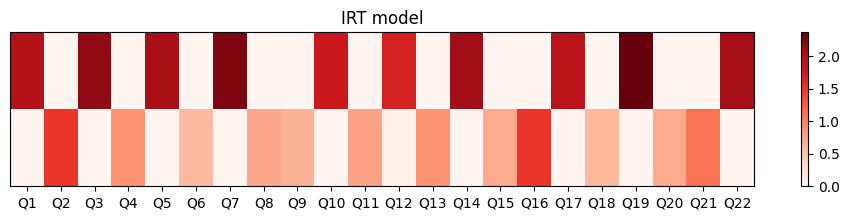

In [23]:
_ = plt.figure(figsize=(12, 2))
plt.pcolormesh(discrim_mean[0, ..., 0], vmin=0, cmap="Reds")
_ = plt.colorbar()
_ = plt.title("IRT model")
_ = plt.yticks([])
_ = plt.xticks(
    np.arange(grm.num_items) + 0.5, labels=[f"Q{j+1}" for j in range(grm.num_items)]
)

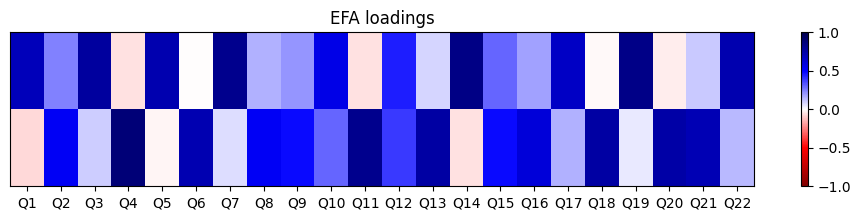

In [24]:
_ = plt.figure(figsize=(12, 2))

plt.pcolormesh(loadings.T, cmap="seismic_r", vmin=-1, vmax=1)
plt.colorbar()
_ = plt.yticks([])
_ = plt.xticks(
    np.arange(grm.num_items) + 0.5, labels=[f"Q{j+1}" for j in range(grm.num_items)]
)
_ = plt.title("EFA loadings")

In [12]:
discrim_mean[0, ..., 0]

array([[5.97160692e-03, 1.52537515e+00, 7.67350739e-03, 8.89869814e-01,
        1.65506461e-03, 5.98064950e-01, 5.37562508e-03, 7.47761137e-01,
        6.74114415e-01, 1.16632302e-02, 7.71366631e-01, 6.90631759e-02,
        8.88581904e-01, 4.30113889e-03, 7.16033845e-01, 1.53677462e+00,
        1.01708924e-02, 6.27476799e-01, 3.77304879e-03, 7.24453250e-01,
        1.11415589e+00, 1.00829324e-02],
       [1.96429247e+00, 1.22957229e-02, 2.15944543e+00, 3.70733931e-03,
        2.04320445e+00, 2.42673509e-05, 2.25770755e+00, 7.65587460e-03,
        8.36620900e-03, 1.77802173e+00, 3.49551980e-03, 1.69749467e+00,
        5.10192044e-03, 2.08751684e+00, 8.71120380e-03, 1.36117142e-02,
        1.92294509e+00, 6.16953511e-04, 2.37217588e+00, 2.22316139e-03,
        6.42973758e-03, 2.07267972e+00]])

In [13]:
scale_indices = [np.where(discrim_mean[0, ..., 0][0, :] > .5)[0].tolist()]
scale_indices += [[i for i in range(22) if i not in scale_indices[0]]]
scale_indices

[[1, 3, 5, 7, 8, 10, 12, 14, 15, 17, 19, 20],
 [0, 2, 4, 6, 9, 11, 13, 16, 18, 21]]

In [14]:
params.keys()

dict_keys(['mu', 'kappa_a', 'kappa', 'eta', 'discriminations', 'difficulties0', 'ddifficulties', 'abilities'])

# Build fully factorized model

In [15]:
fgrm = FactorizedGRModel(
    data=tfdata,
    item_keys=item_names,
    num_people=num_people,
    dim=dim,
    eta_scale=1e-3,
    kappa_scale=1e-3,
    weight_exponent=1,
    response_cardinality=10,
    scale_indices=scale_indices,
    discrimination_guess=tf.cast(np.abs(loadings).T, tf.float64)[tf.newaxis, :, :, tf.newaxis]
)

# Fit by projecting the original model

In [16]:
fgrm.fit_projection(grm, data_factory_factory(shuffle=True, repeat=True), num_steps=500)

Running optimization for 500 steps of 1 accumulated batches, checking every 1 steps
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-1


  0%|          | 0/500 [00:00<?, ?it/s]

Step 1: average-batch loss:0.7762323458498223 rel loss: 1.2882740655508192e+308
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-2


  0%|          | 1/500 [00:01<14:27,  1.74s/it]

Step 2: average-batch loss:0.7810654928924797 rel loss: 0.006187889602905289
New learning rate: 0.95


  0%|          | 2/500 [00:01<06:43,  1.23it/s]

Step 3: average-batch loss:0.5561172065726646 rel loss: 0.39580710086947557
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-3


  1%|          | 3/500 [00:02<04:18,  1.93it/s]

Step 4: average-batch loss:0.3596065874090897 rel loss: 0.5464600094770338
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-4


  1%|          | 4/500 [00:02<03:11,  2.59it/s]

Step 5: average-batch loss:0.25654544493993986 rel loss: 0.4017266511719886
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-5


  1%|          | 5/500 [00:02<02:31,  3.26it/s]

Step 6: average-batch loss:0.22575571503348402 rel loss: 0.13638516261654382
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-6


  1%|          | 6/500 [00:02<02:09,  3.83it/s]

Step 7: average-batch loss:0.20806812594841126 rel loss: 0.08500864322418249
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-7


  1%|▏         | 7/500 [00:02<01:54,  4.31it/s]

Step 8: average-batch loss:0.17791407987325433 rel loss: 0.16948656394501557
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-8


  2%|▏         | 8/500 [00:02<01:44,  4.70it/s]

Step 9: average-batch loss:0.14463460320121246 rel loss: 0.2300934626670507
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-9


  2%|▏         | 9/500 [00:03<01:41,  4.84it/s]

Step 10: average-batch loss:0.12616578245656232 rel loss: 0.14638533828305456
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-10


  2%|▏         | 10/500 [00:03<01:35,  5.14it/s]

Step 11: average-batch loss:0.12783005942907827 rel loss: 0.013019449259032152
New learning rate: 0.9025


  2%|▏         | 11/500 [00:03<01:31,  5.33it/s]

Step 12: average-batch loss:0.11043077577656184 rel loss: 0.1424875137329256
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-11


  2%|▏         | 12/500 [00:03<01:29,  5.47it/s]

Step 13: average-batch loss:0.09551208949764528 rel loss: 0.15619683704317197
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-12


  3%|▎         | 13/500 [00:03<01:28,  5.50it/s]

Step 14: average-batch loss:0.07991134099497911 rel loss: 0.19522571275141506
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-13


  3%|▎         | 14/500 [00:03<01:25,  5.65it/s]

Step 15: average-batch loss:0.08309927648770667 rel loss: 0.03836297531662824
New learning rate: 0.8573749999999999


  3%|▎         | 15/500 [00:04<01:22,  5.86it/s]

Step 16: average-batch loss:0.08934675160190489 rel loss: 0.10560440573112692
New learning rate: 0.8145062499999999


  3%|▎         | 16/500 [00:04<01:20,  6.03it/s]

Step 17: average-batch loss:0.07960246327566048 rel loss: 0.0038802532812206958
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-14


  3%|▎         | 17/500 [00:04<01:22,  5.85it/s]

Step 18: average-batch loss:0.06305773788792006 rel loss: 0.26237422942680416
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-15


  4%|▎         | 18/500 [00:04<01:25,  5.66it/s]

Step 19: average-batch loss:0.05480325742816981 rel loss: 0.15062025228280138
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-16


  4%|▍         | 19/500 [00:04<01:26,  5.58it/s]

Step 20: average-batch loss:0.05272783560281643 rel loss: 0.03936102822400937
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-17


  4%|▍         | 20/500 [00:05<01:25,  5.61it/s]

Step 21: average-batch loss:0.055070700970848784 rel loss: 0.04254286447656677
New learning rate: 0.7737809374999998


  4%|▍         | 21/500 [00:05<01:22,  5.80it/s]

Step 22: average-batch loss:0.05701886367776169 rel loss: 0.07525628885197923
New learning rate: 0.7350918906249998


  4%|▍         | 22/500 [00:05<01:21,  5.87it/s]

Step 23: average-batch loss:0.0535147465680064 rel loss: 0.014704563053287881
New learning rate: 0.6983372960937497


  5%|▍         | 23/500 [00:05<01:20,  5.94it/s]

Step 24: average-batch loss:0.04938682340419819 rel loss: 0.06764987031610196
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-18


  5%|▍         | 24/500 [00:05<01:21,  5.88it/s]

Step 25: average-batch loss:0.04173448228288905 rel loss: 0.1833577584463428
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/17a8d80c-91a1-4c7e-bd04-773939b38b08/17a8d80c-91a1-4c7e-bd04-773939b38b08-19


  5%|▌         | 25/500 [00:05<01:21,  5.83it/s]

Step 26: average-batch loss:0.04182322727720331 rel loss: 0.002121906894608227
New learning rate: 0.6634204312890623


  5%|▌         | 26/500 [00:06<01:20,  5.91it/s]

Step 27: average-batch loss:0.04179611204993431 rel loss: 0.0014745334918145347


  5%|▌         | 27/500 [00:06<01:18,  6.03it/s]

Terminating because the loss converged


  5%|▌         | 27/500 [00:06<01:50,  4.29it/s]


<tf.Tensor: shape=(27,), dtype=float64, numpy=
array([0.77623235, 0.78106549, 0.55611721, 0.35960659, 0.25654544,
       0.22575572, 0.20806813, 0.17791408, 0.1446346 , 0.12616578,
       0.12783006, 0.11043078, 0.09551209, 0.07991134, 0.08309928,
       0.08934675, 0.07960246, 0.06305774, 0.05480326, 0.05272784,
       0.0550707 , 0.05701886, 0.05351475, 0.04938682, 0.04173448,
       0.04182323, 0.04179611])>

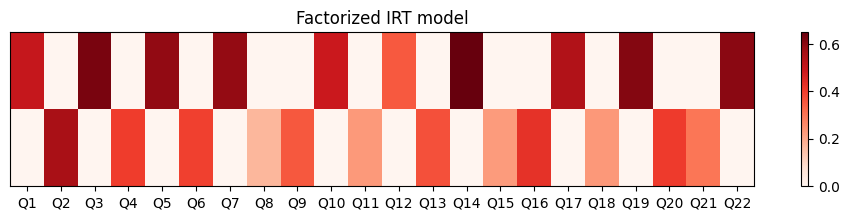

In [25]:
_ = plt.figure(figsize=(12, 2))

fparams = fgrm.sample(256)
fdiscrim = fparams['discriminations']
fdiscrim_mean = np.mean(fdiscrim, axis=0)
plt.pcolormesh(fdiscrim_mean[0, ..., 0], vmin=0, cmap='Reds')
_ = plt.colorbar()
_ = plt.title("Factorized IRT model")
_ = plt.yticks([])
_ = plt.xticks(
    np.arange(grm.num_items) + 0.5, labels=[f"Q{j+1}" for j in range(grm.num_items)]
)